In [2]:
import os
import pandas as pd

In [3]:
me = pd.read_csv('../metrics/ddim_sd15_metrics.csv')
me.head(5)

Folder  \
0  ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...   
1  ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...   
2  ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...   
3  ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...   
4  ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...   

   Image Similarity (convnextv2-l-resize) (in)  \
0                                     0.722954   
1                                     0.932839   
2                                     0.753673   
3                                     0.806195   
4                                     0.857702   

   Squared Centroid Distance (convnextv2-l-resize) (in)  \
0                                           0.164182      
1                                           0.056332      
2                                           0.139778      
3                                           0.057309      
4                                           0.116087      

   Image Similarity (convnextv2-l-resize) (out)  \
0                                      0.696312   
1                                      0.525180   
2                                      0.497875   
3                                      0.632379   
4                                      0.637034   

   Squared Centroid Distance (convnextv2-l-resize) (out)  \
0                                           0.105159       
1                                           0.267054       
2                                           0.274781       
3                                           0.181244       
4                                           0.179164       

   Image Similarity (convnextv2-l-resize) (trigger)  \
0                                          0.657544   
1                                          0.931116   
2                                          0.771857   
3                                          0.799026   
4                                          0.858453   

   Squared Centroid Distance (convnextv2-l-resize) (trigger)  \
0                                           0.288943           
1                                           0.078600           
2                                           0.191470           
3                                           0.130364           
4                                           0.143105           

   Image Similarity (convnextv2-l-crop) (in)  \
0                                   0.704253   
1                                   0.917687   
2                                   0.748136   
3                                   0.793642   
4                                   0.838721   

   Squared Centroid Distance (convnextv2-l-crop) (in)  \
0                                           0.174471    
1                                           0.057653    
2                                           0.127173    
3                                           0.079559    
4                                           0.137542    

   Image Similarity (convnextv2-l-crop) (out)  ...  \
0                                    0.678804  ...   
1                                    0.519041  ...   
2                                    0.491485  ...   
3                                    0.631665  ...   
4                                    0.618951  ...   

   Squared Centroid Distance (clip-L-14-padding) (trigger)  \
0                                           0.489861         
1                                           0.169073         
2                                           0.225950         
3                                           0.280395         
4                                           0.219317         

   Text Similarity (in)  Text Similarity (out)  Text Similarity (trigger)  \
0              0.164268               0.198204                   0.143711   
1              0.128877               0.216944                   0.167584   
2              0.229720               0.276352                   0.201625   
3              0.284504        

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_metrics_classwise(df, first_level_folders, metrics, save_folder=None):
    """
    df: The dataframe with Folder and metric columns
    first_level_folders: List of first level folder names to filter by
    metrics: List of metric columns to plot
    """
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']  # Define more if needed
    markers = ['o', 's', '^', 'v', '<', '>', 'p', '*']  # Define more if needed
    dfs_to_concat = []

    if save_folder is not None:
        os.makedirs(save_folder, exist_ok=True)

    for metric in metrics:
        plt.figure(figsize=(10, 8))

        for idx, first_level in enumerate(first_level_folders):
            # Filter the dataframe based on first level folder
            filtered_df = df[df['Folder'].str.split('/').str[0] == first_level]
            dfs_to_concat.append(filtered_df)

            # Ensure we don't run out of colors or markers
            color = colors[idx % len(colors)]
            marker = markers[idx % len(markers)]

            # Extract subfolders for the x-axis
            subfolders = filtered_df['Folder'].str.split('/').str[1:].apply(
                '/'.join)

            plt.scatter(subfolders,
                        filtered_df[metric],
                        label=first_level,
                        marker=marker,
                        color=color)

        plt.xlabel("Subfolders")
        plt.ylabel(metric)
        plt.title(f"Metric: {metric}")
        n_columns = min(2, len(first_level_folders))
        plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=n_columns)
        plt.xticks(rotation=90)
        plt.tight_layout()
        if save_folder is not None: 
            plt.savefig(os.path.join(save_folder, f"{metric}.png"))

    return pd.concat(dfs_to_concat).drop_duplicates().reset_index(drop=True)

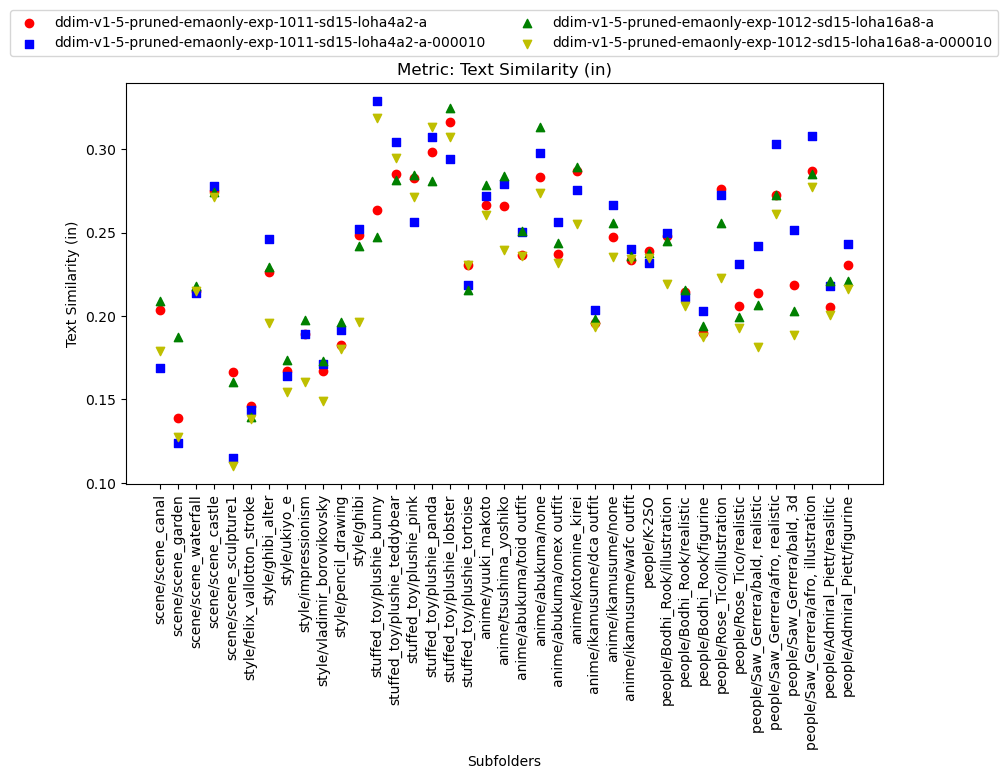

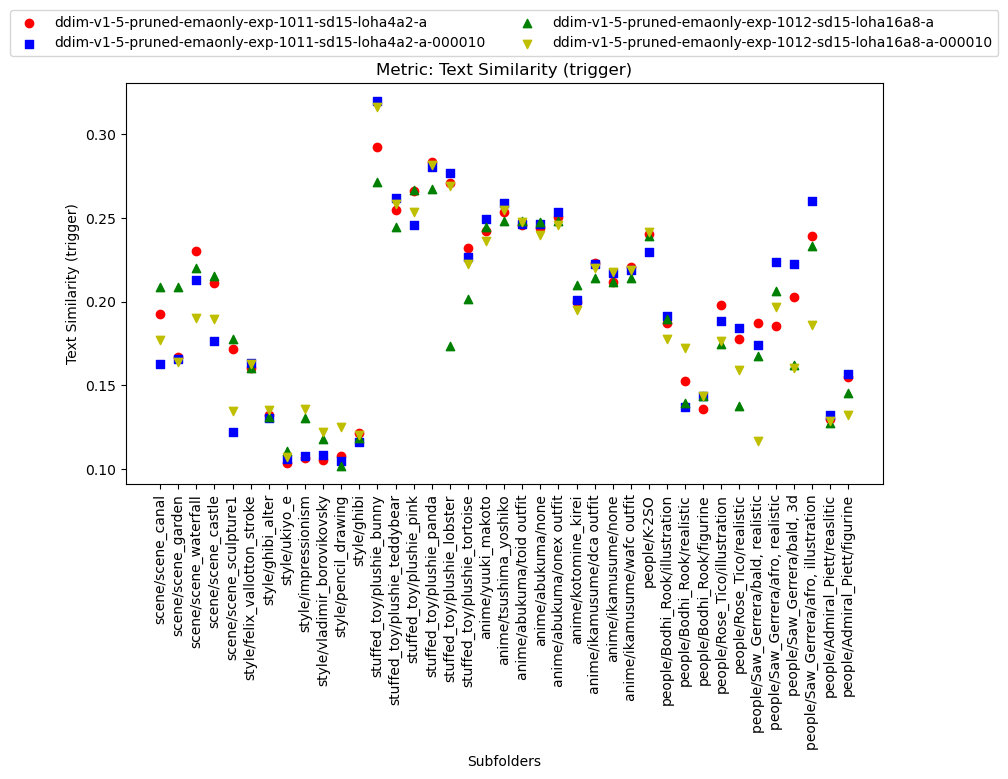

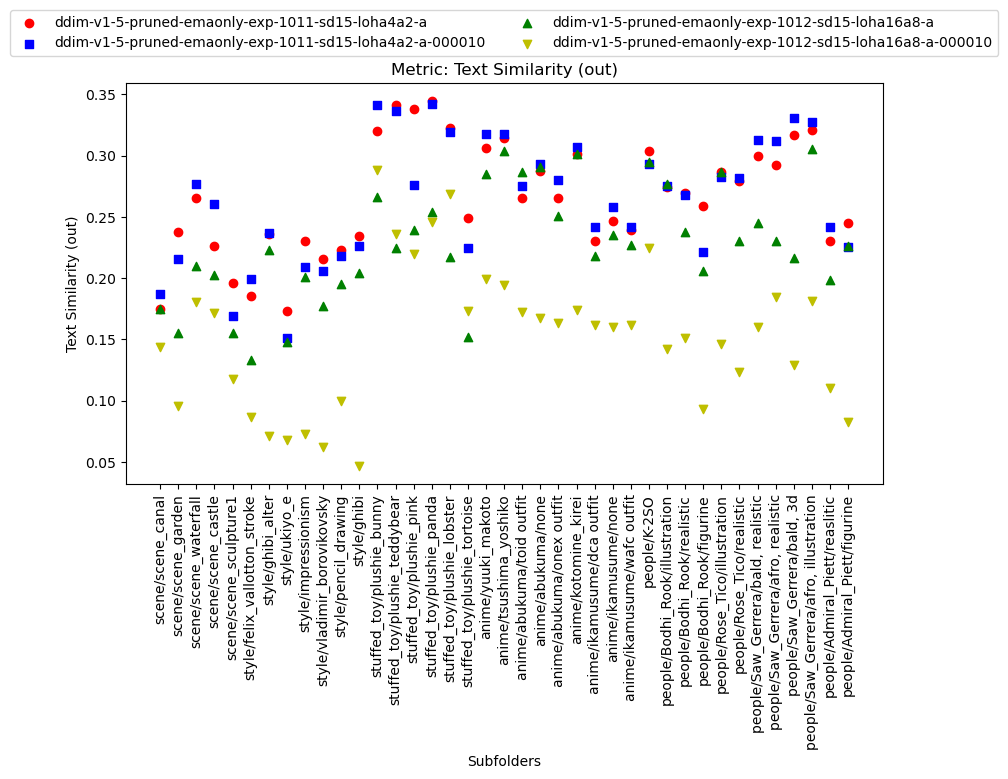

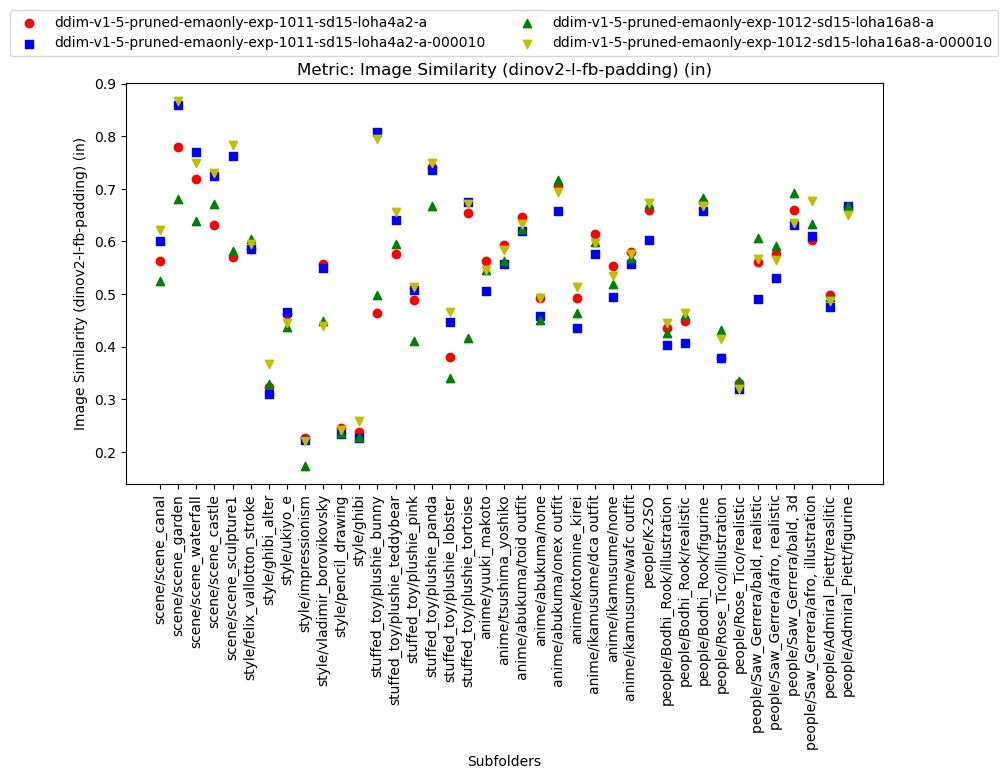

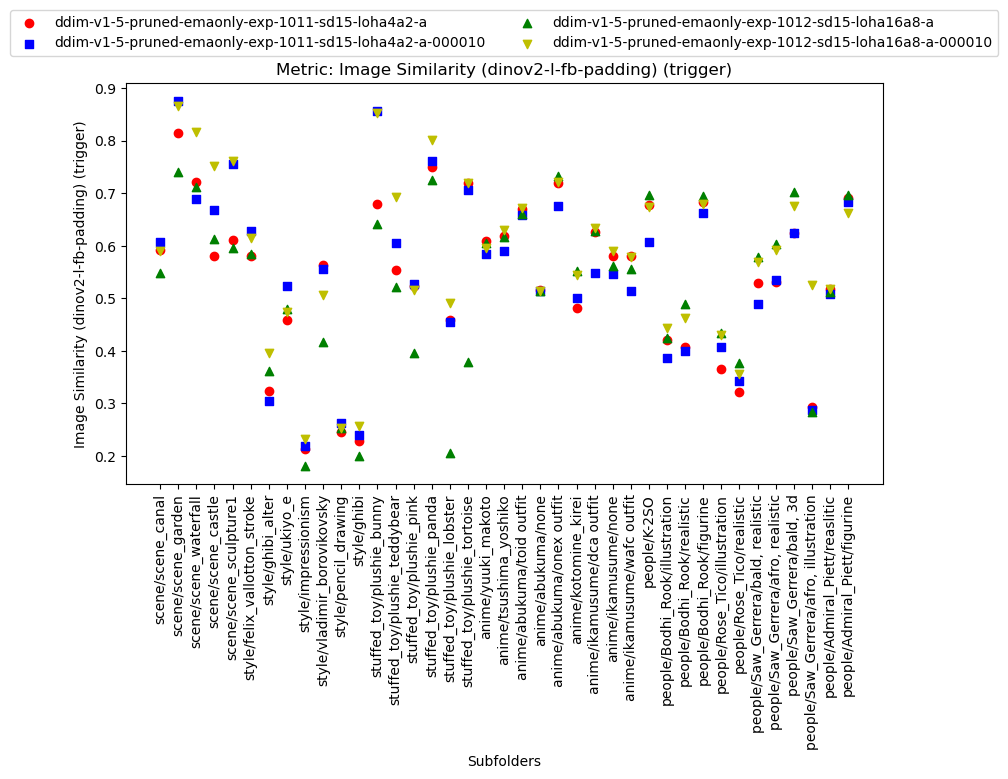

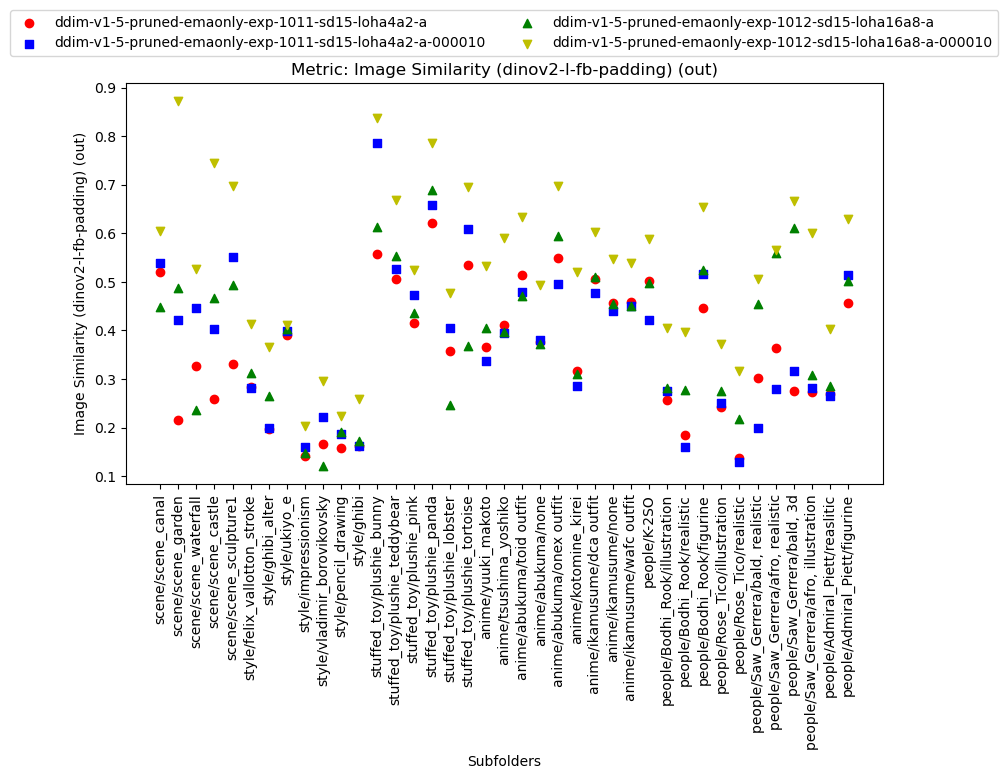

In [8]:
resulting_dfs = plot_metrics_classwise(
    me, [
        "ddim-v1-5-pruned-emaonly-exp-1011-sd15-loha4a2-a",
        "ddim-v1-5-pruned-emaonly-exp-1011-sd15-loha4a2-a-000010",
        "ddim-v1-5-pruned-emaonly-exp-1012-sd15-loha16a8-a",
        "ddim-v1-5-pruned-emaonly-exp-1012-sd15-loha16a8-a-000010",
    ], [
        "Text Similarity (in)",
        "Text Similarity (trigger)",
        "Text Similarity (out)",
        "Image Similarity (dinov2-l-fb-padding) (in)",
        "Image Similarity (dinov2-l-fb-padding) (trigger)",
        "Image Similarity (dinov2-l-fb-padding) (out)",
    ],
    save_folder='figures/classwise/loha_10_50/')

For saw_gerrera/afro|bald, realistic the vendi score of "v15-exp-1053-sd15-lokrf8dinf-lr1e-3-a" is abnormally low 

For admiral piett, the textsim-out score is low, maybe due to library and dog, need further investigation

For bohdi_rook/illustration, db should not have lower diversity score

### Lora Loha db 30

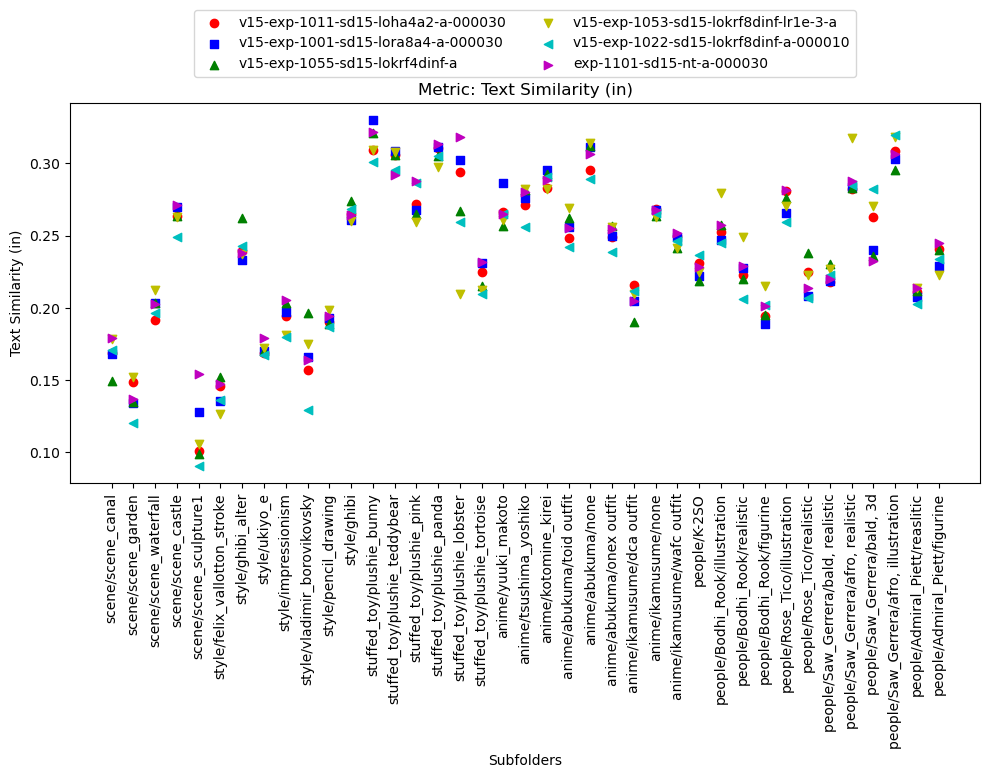

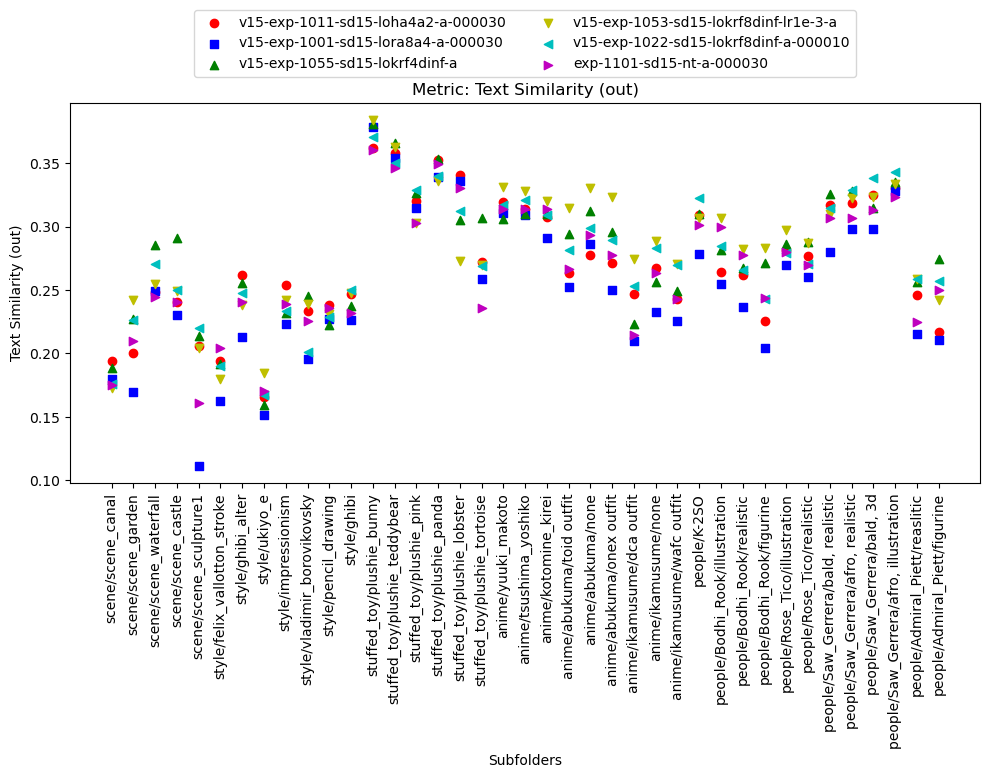

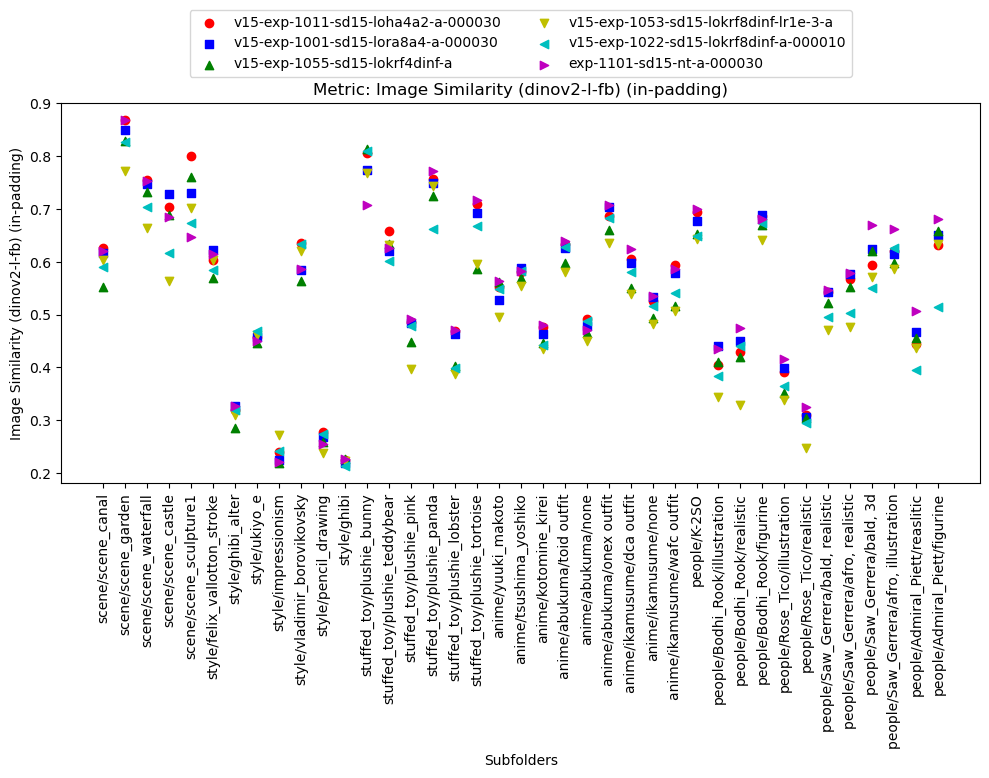

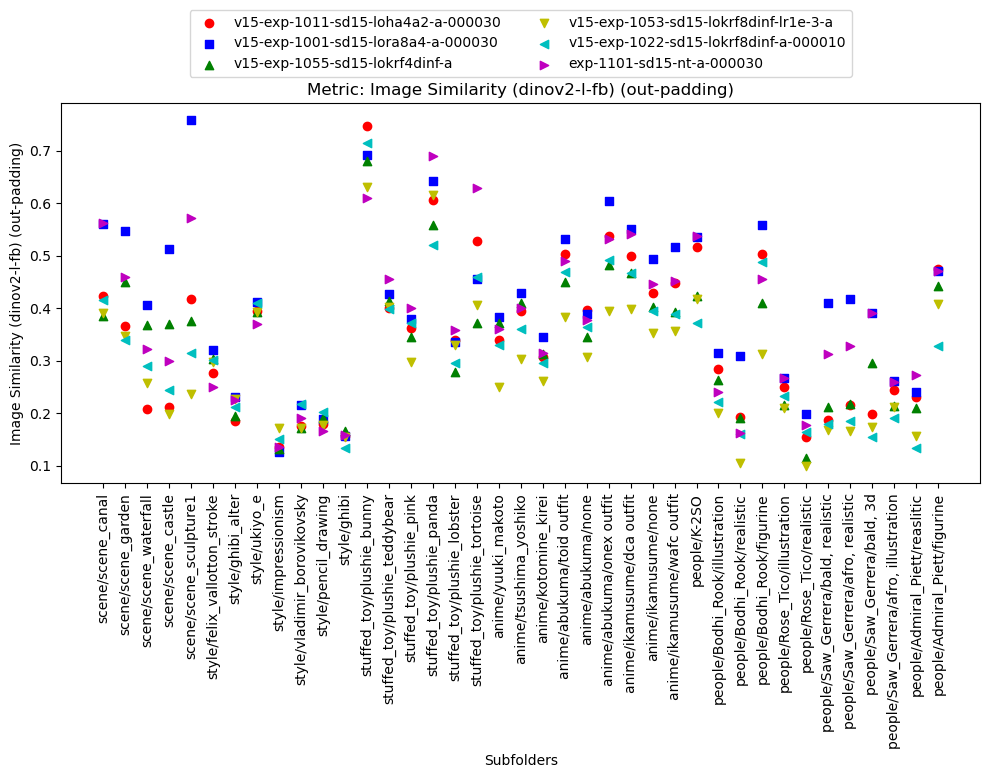

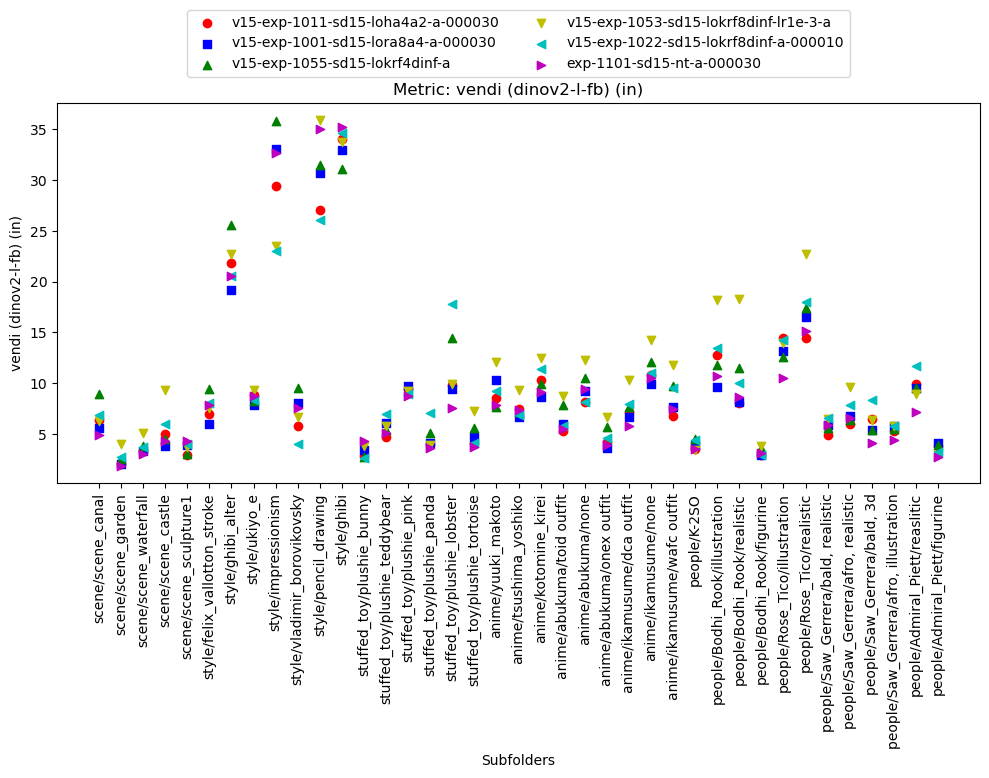

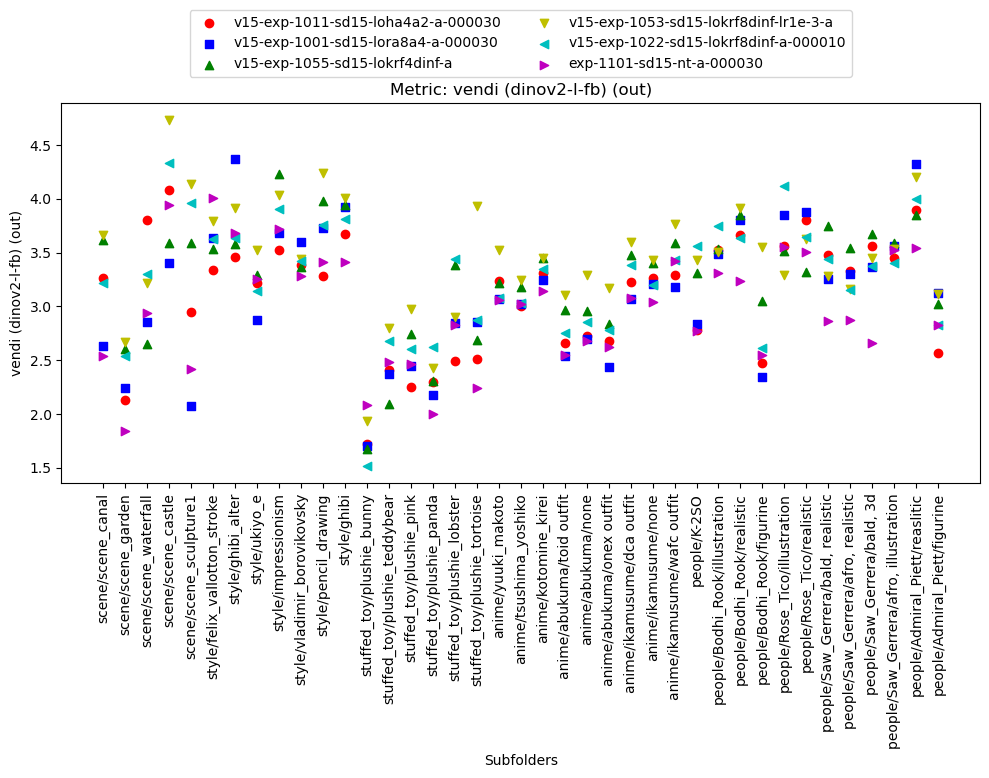

In [11]:
resulting_dfs = plot_metrics_classwise(
    me, [
        "v15-exp-1011-sd15-loha4a2-a-000030",
        "v15-exp-1001-sd15-lora8a4-a-000030",
        "v15-exp-1055-sd15-lokrf4dinf-a",
        "v15-exp-1053-sd15-lokrf8dinf-lr1e-3-a",
        "v15-exp-1022-sd15-lokrf8dinf-a-000010",
        "exp-1101-sd15-nt-a-000030",
    ], [
        "Text Similarity (in)",
        "Text Similarity (out)",
        "Image Similarity (dinov2-l-fb) (in-padding)",
        "Image Similarity (dinov2-l-fb) (out-padding)",
        "vendi (dinov2-l-fb) (in)",
        "vendi (dinov2-l-fb) (out)",
    ],
    save_folder='figures/classwise/lora_loha_lokr_db_vendi/')

### Lora Loha db 30

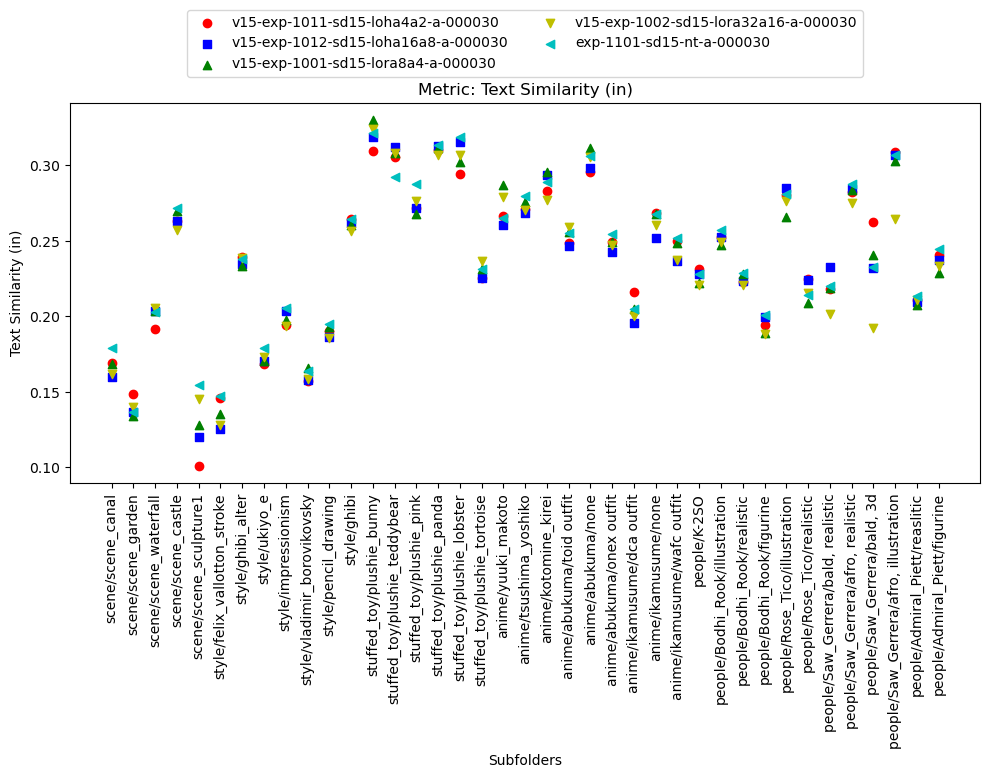

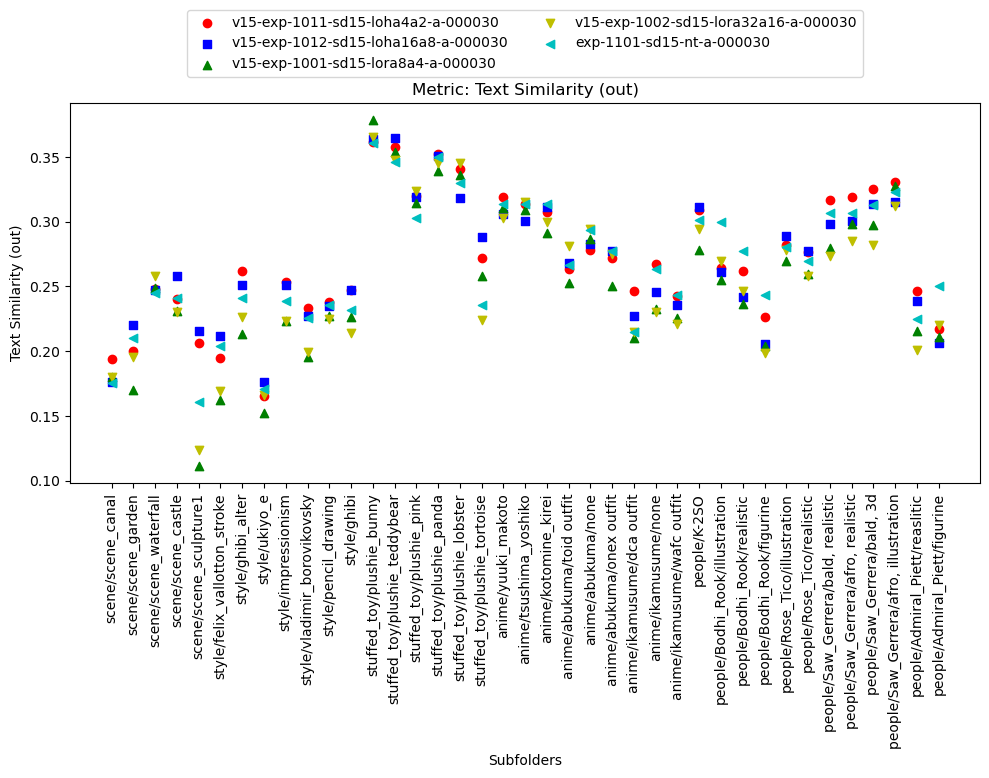

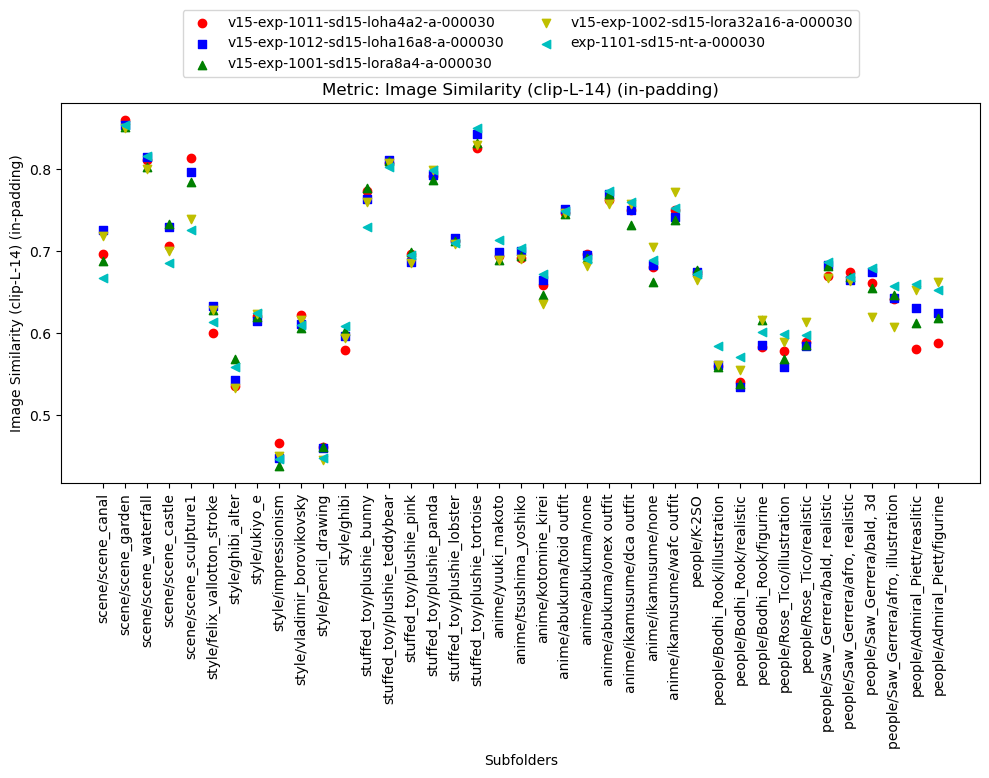

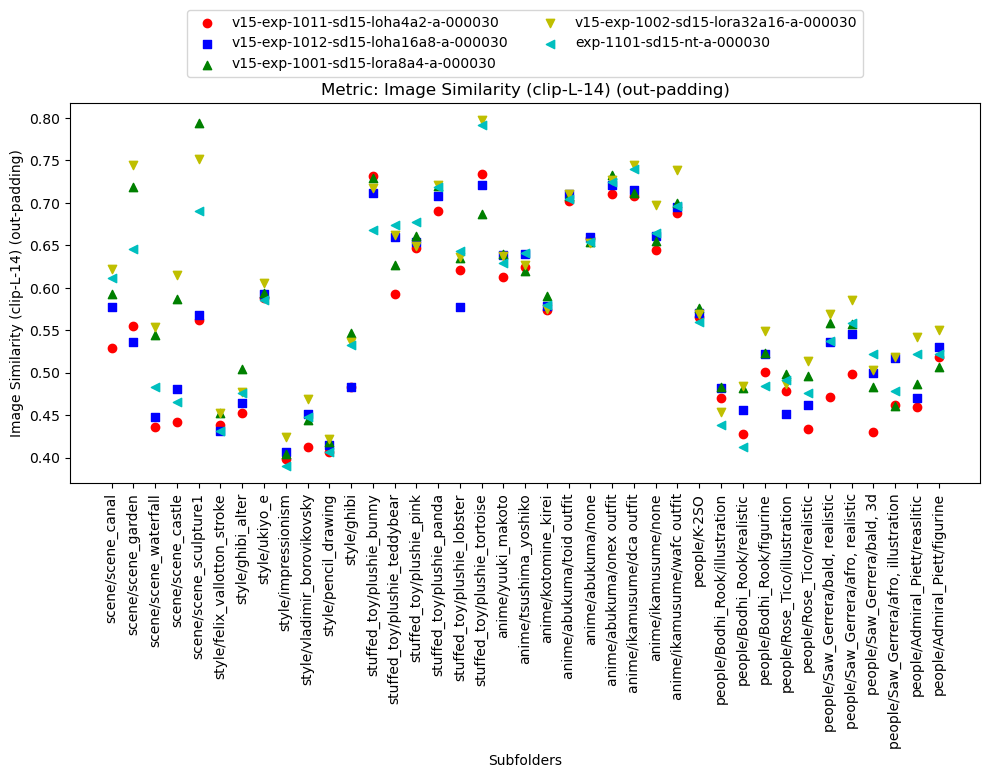

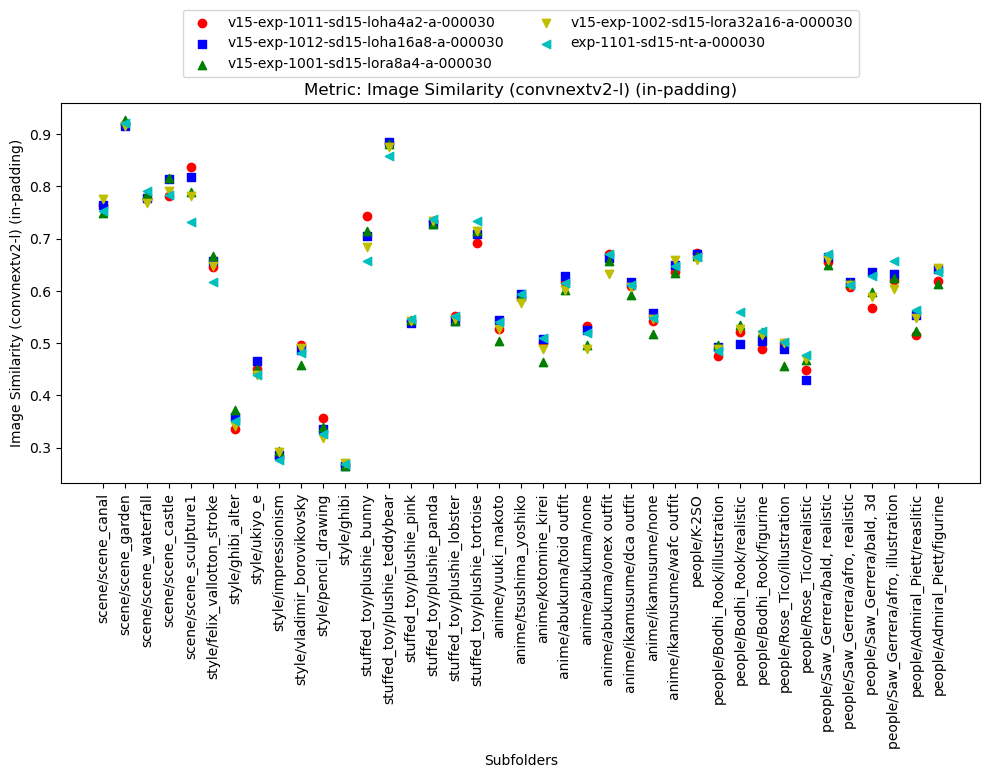

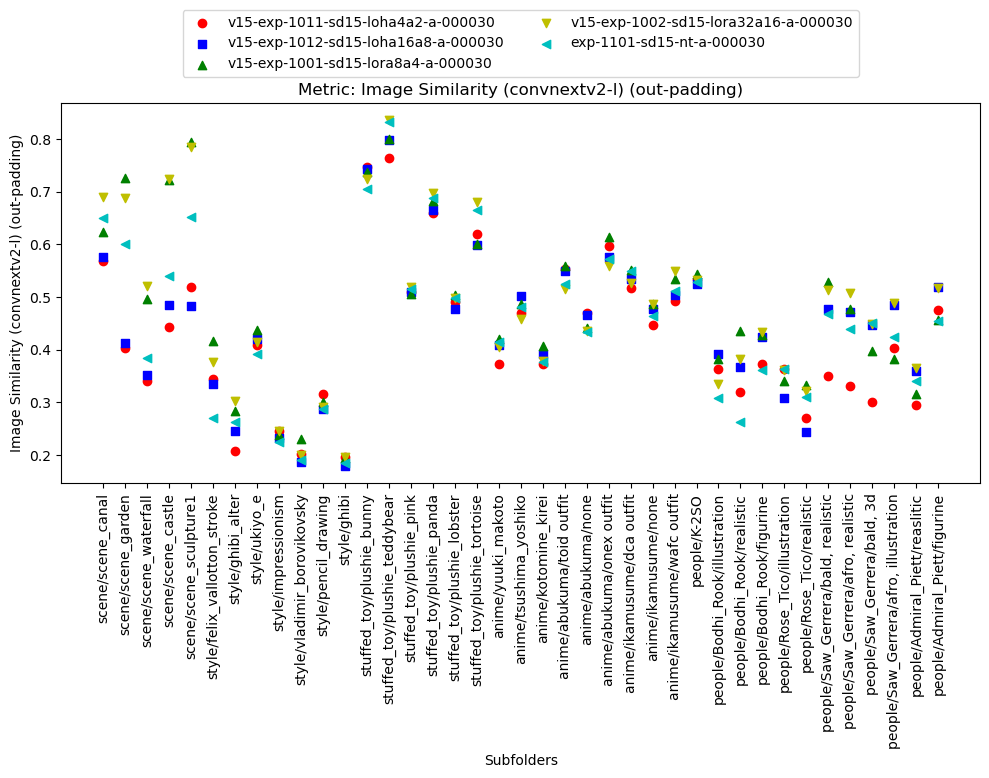

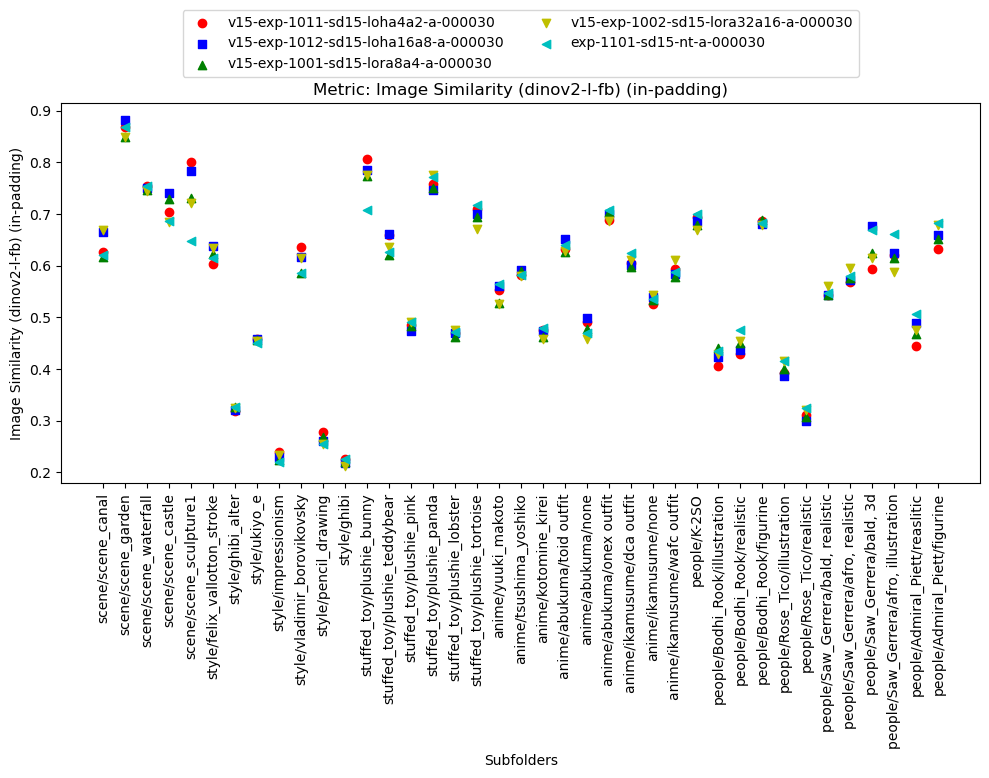

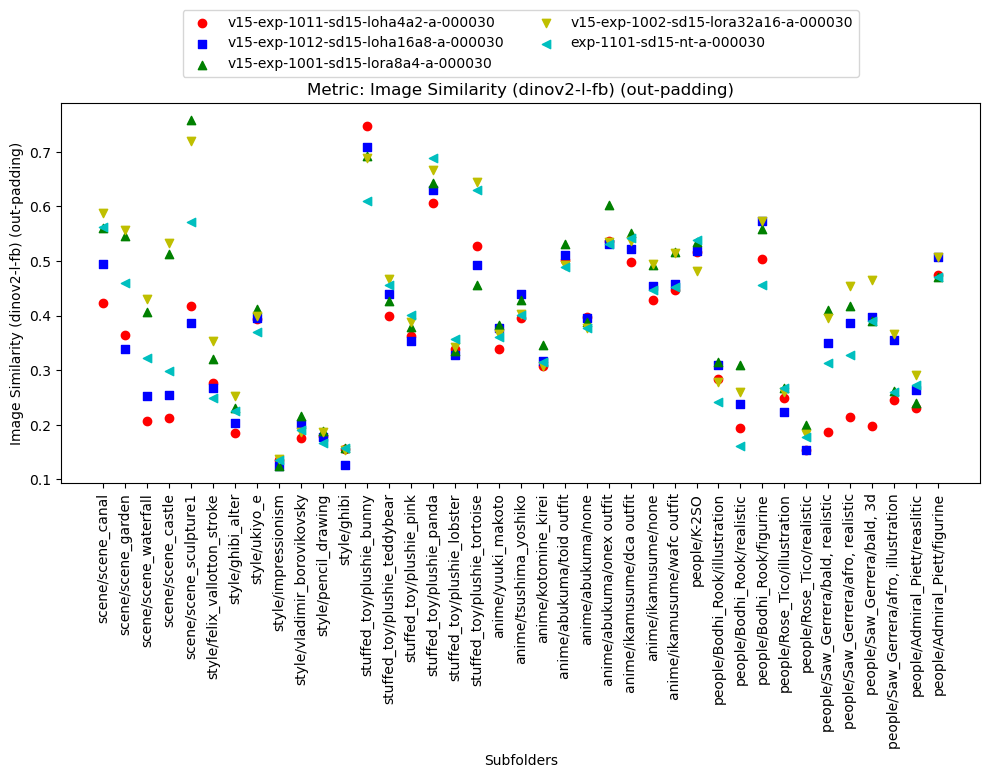

In [10]:
resulting_dfs = plot_metrics_classwise(
    me, [
        "v15-exp-1011-sd15-loha4a2-a-000030",
        "v15-exp-1012-sd15-loha16a8-a-000030",
        "v15-exp-1001-sd15-lora8a4-a-000030",
        "v15-exp-1002-sd15-lora32a16-a-000030",
        "exp-1101-sd15-nt-a-000030",
    ], [
        "Text Similarity (in)", "Text Similarity (out)",
        "Image Similarity (clip-L-14) (in-padding)",
        "Image Similarity (clip-L-14) (out-padding)",
        "Image Similarity (convnextv2-l) (in-padding)",
        "Image Similarity (convnextv2-l) (out-padding)",
        "Image Similarity (dinov2-l-fb) (in-padding)",
        "Image Similarity (dinov2-l-fb) (out-padding)",
    ],
    save_folder='figures/classwise/lora_loha_db_30/')

### Lora Loha

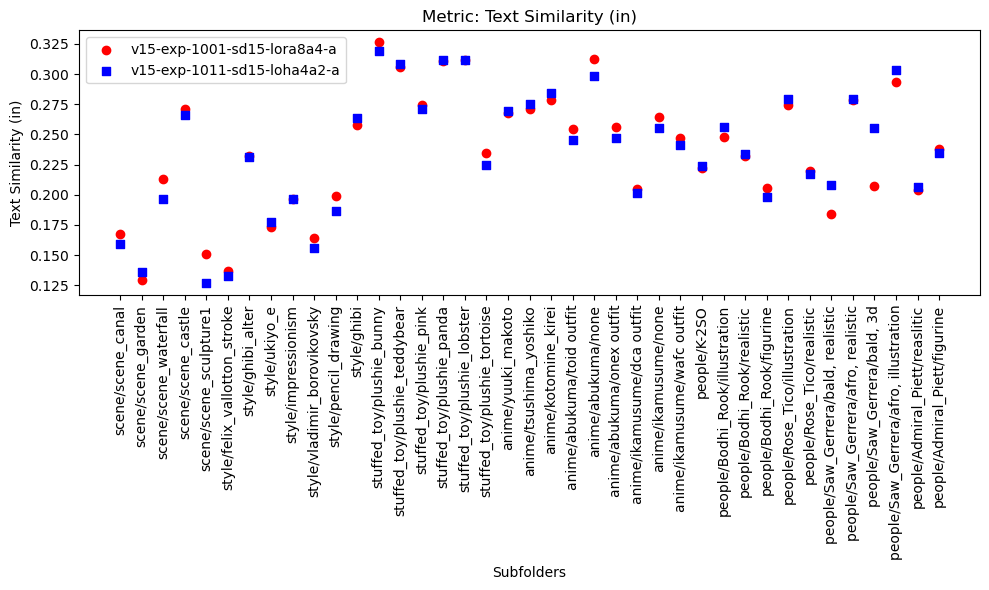

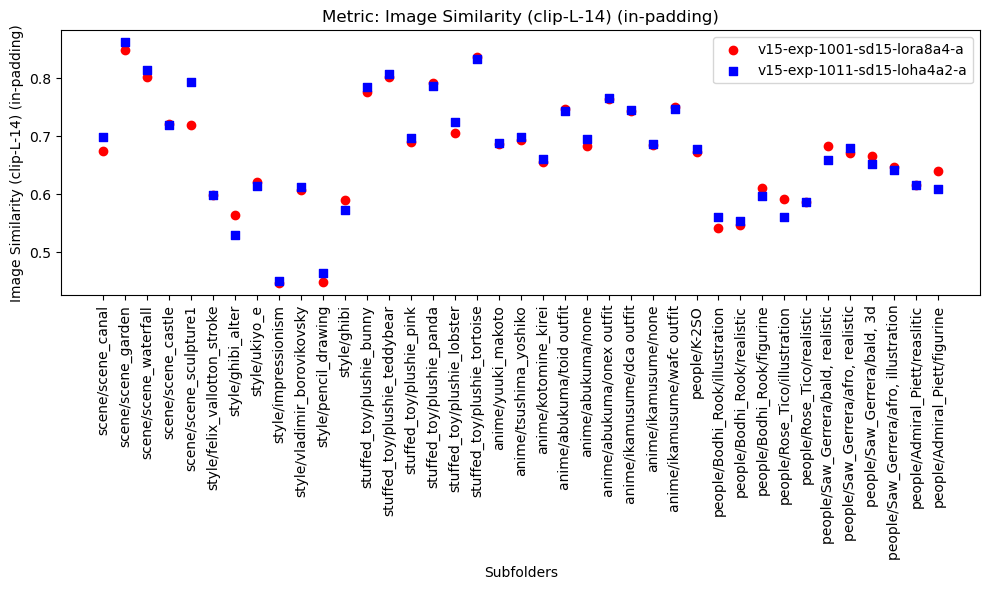

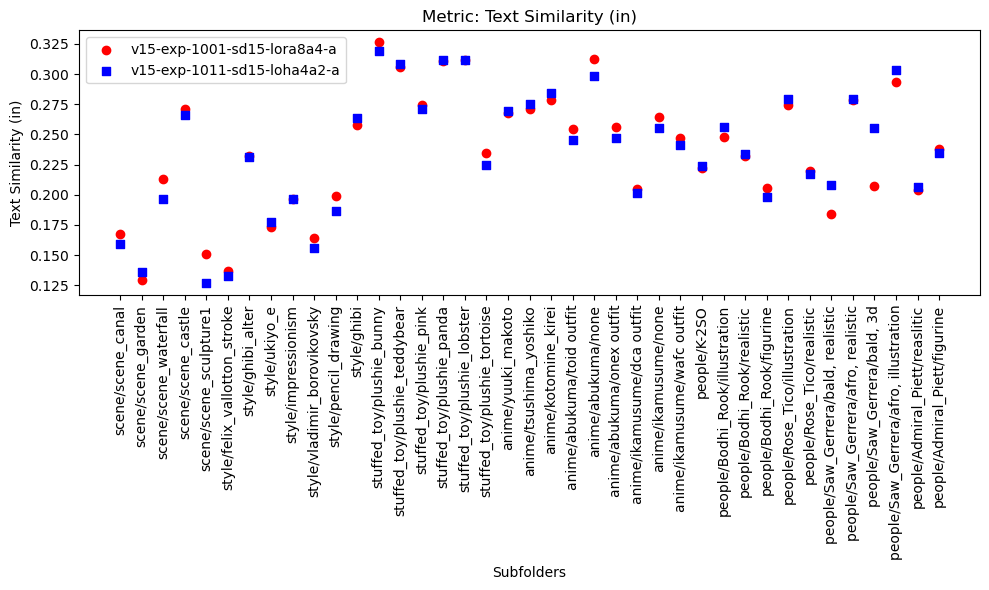

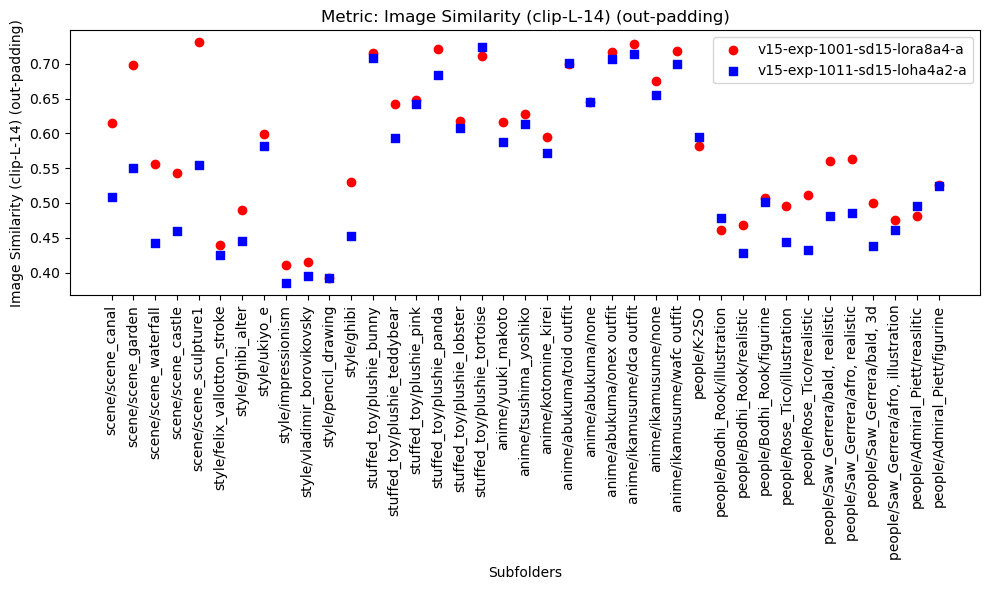

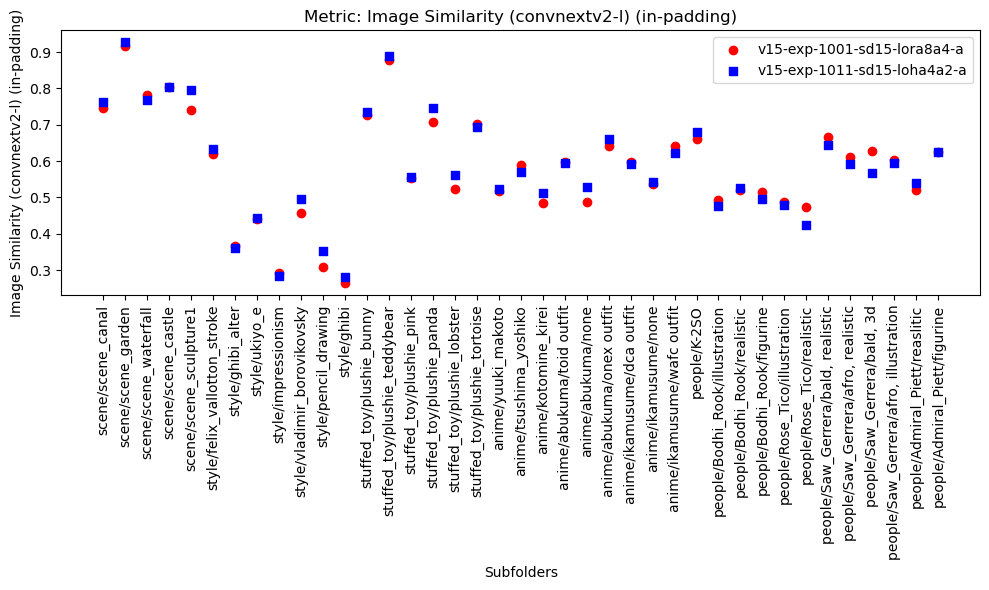

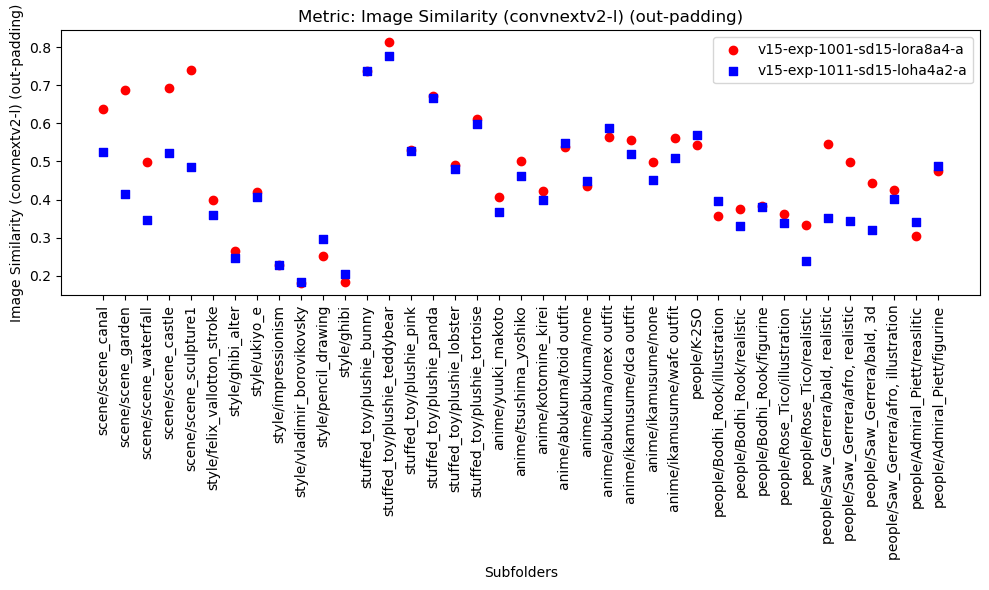

In [53]:
resulting_dfs = plot_metrics_classwise(
    sim, ["v15-exp-1001-sd15-lora8a4-a", "v15-exp-1011-sd15-loha4a2-a"], [
        "Text Similarity (in)", "Image Similarity (clip-L-14) (in-padding)",
        "Text Similarity (in)", "Image Similarity (clip-L-14) (out-padding)",
        "Image Similarity (convnextv2-l) (in-padding)",
        "Image Similarity (convnextv2-l) (out-padding)"
    ],
    save_folder='figures/classwise/1001_1011/')

### Lora Loha db 50

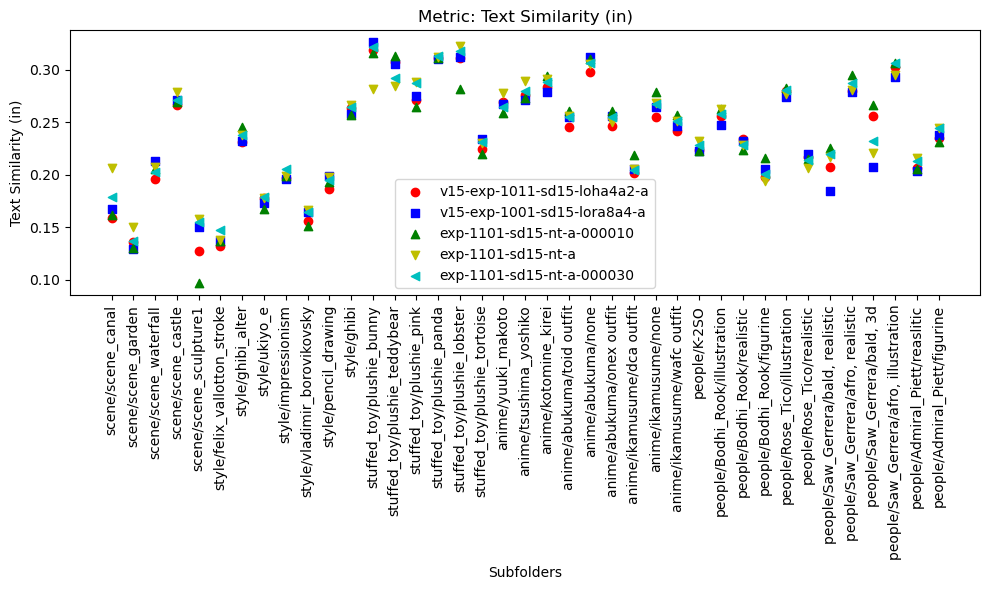

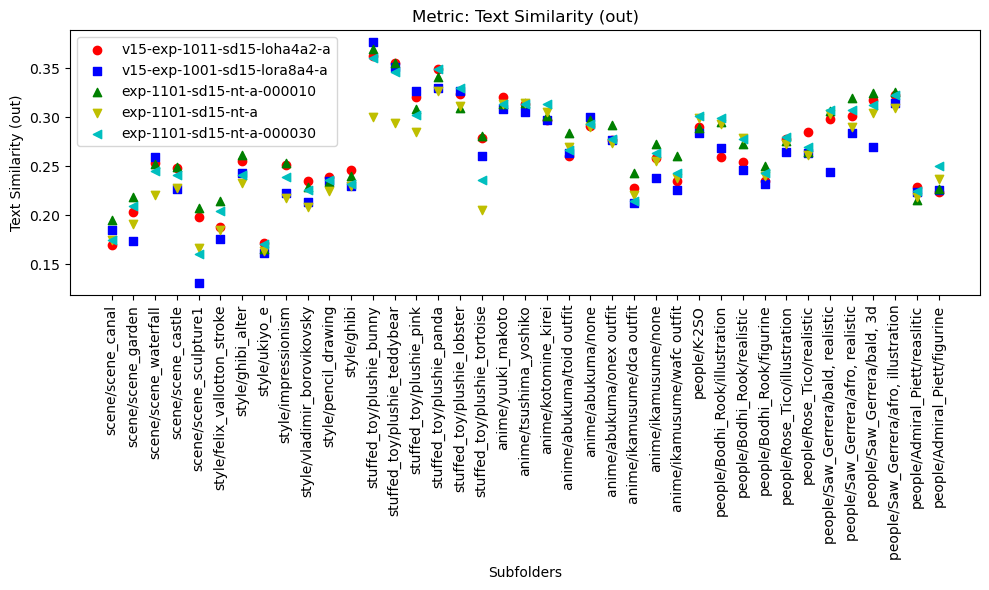

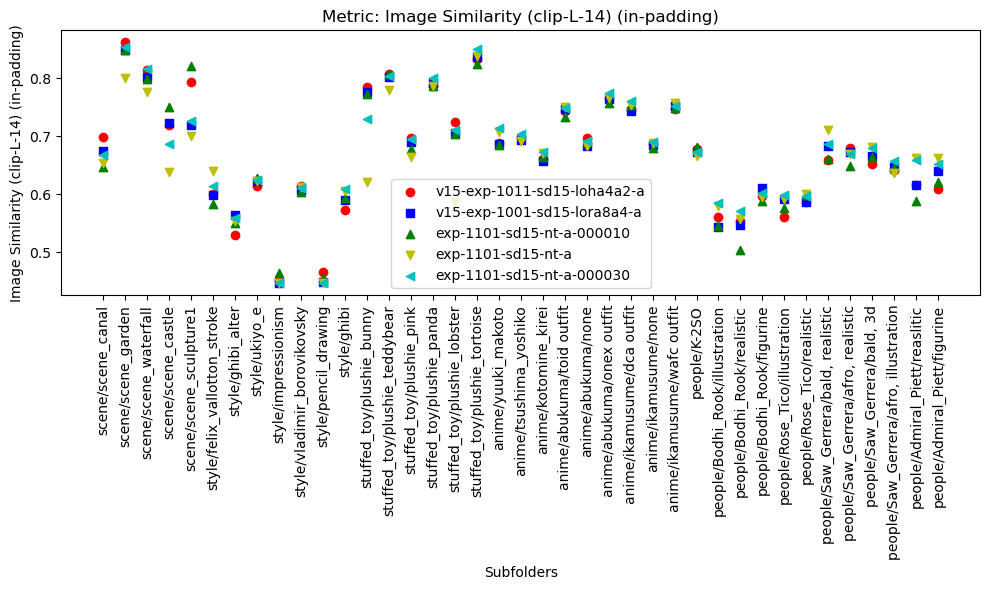

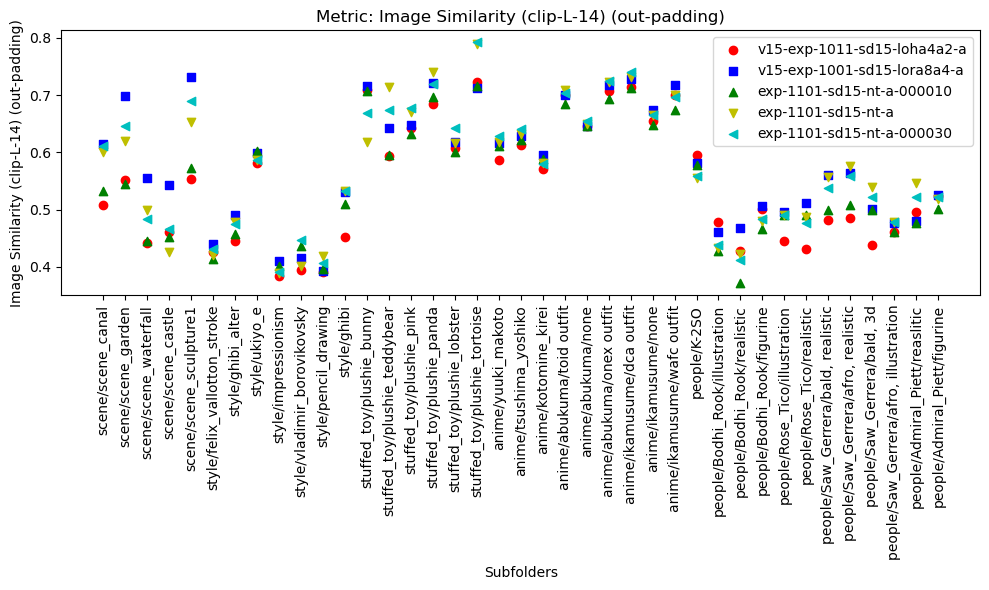

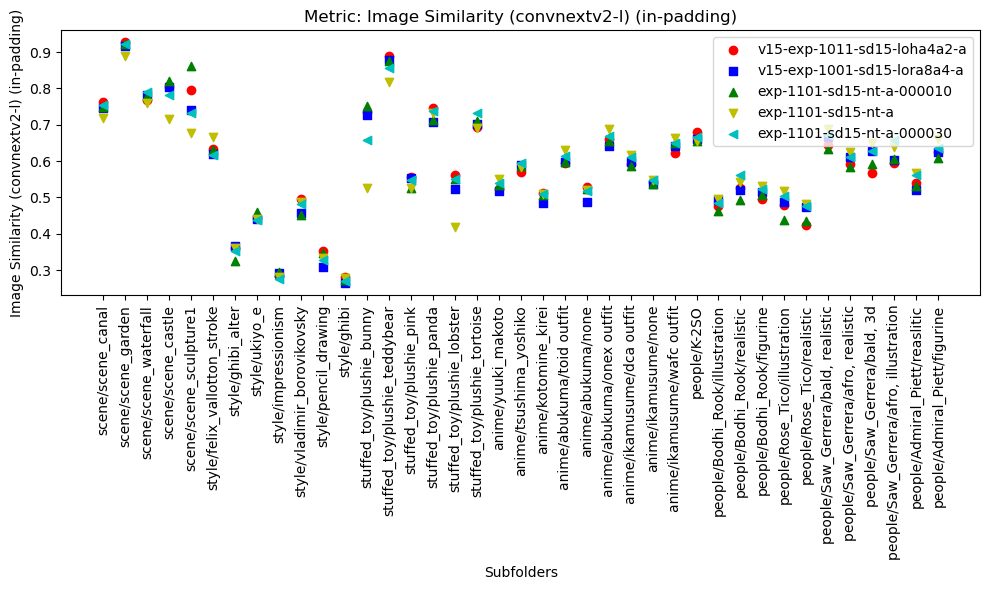

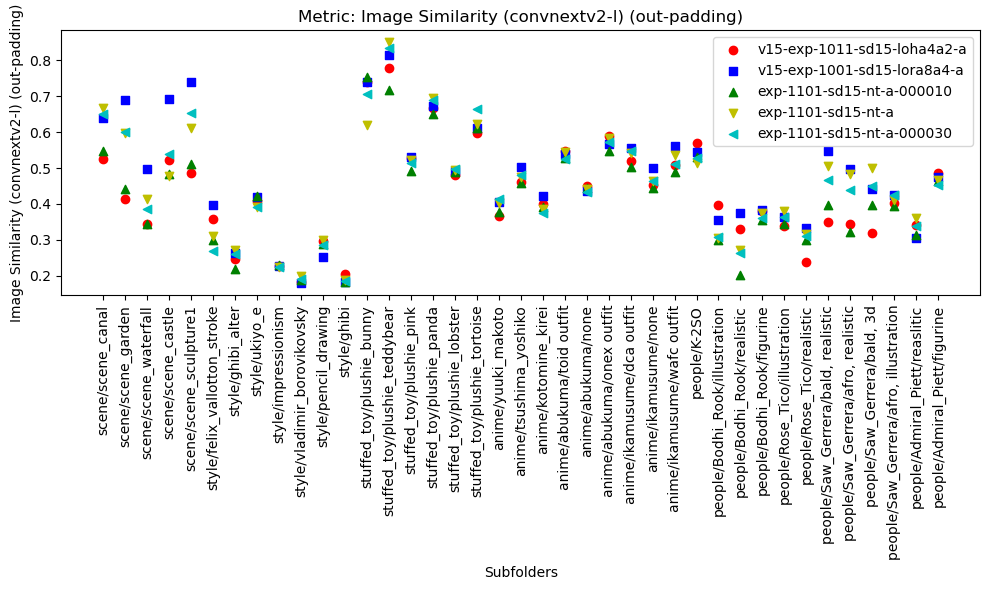

In [62]:
resulting_dfs = plot_metrics_classwise(sim, [
    "v15-exp-1011-sd15-loha4a2-a",
    "v15-exp-1001-sd15-lora8a4-a",
    "exp-1101-sd15-nt-a-000010",
    "exp-1101-sd15-nt-a",
    "exp-1101-sd15-nt-a-000030",
], [
    "Text Similarity (in)", "Text Similarity (out)",
    "Image Similarity (clip-L-14) (in-padding)",
    "Image Similarity (clip-L-14) (out-padding)",
    "Image Similarity (convnextv2-l) (in-padding)",
    "Image Similarity (convnextv2-l) (out-padding)"
],
                             save_folder='figures/classwise/lora_loha_db/')

### Lora Loha

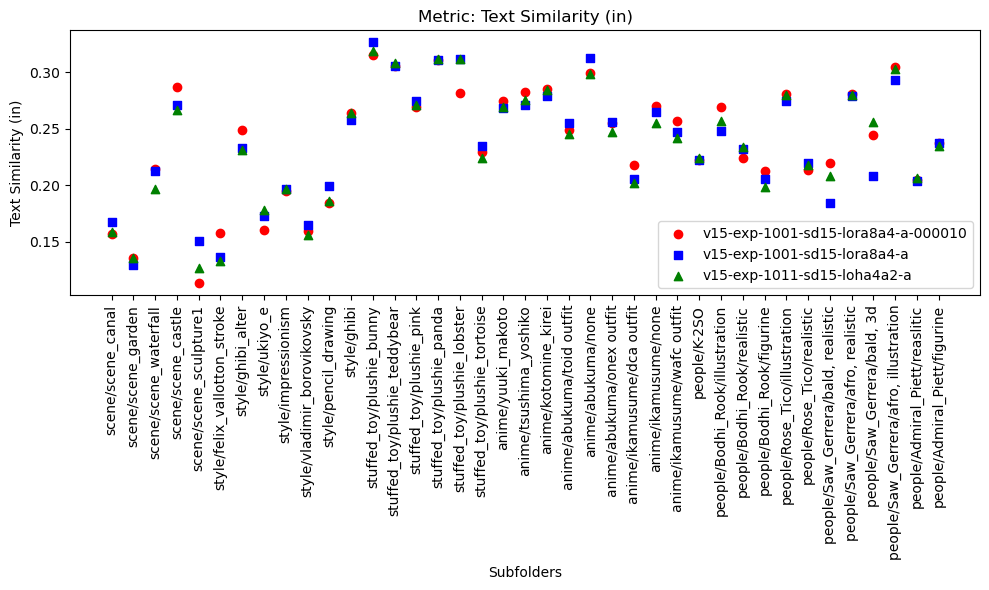

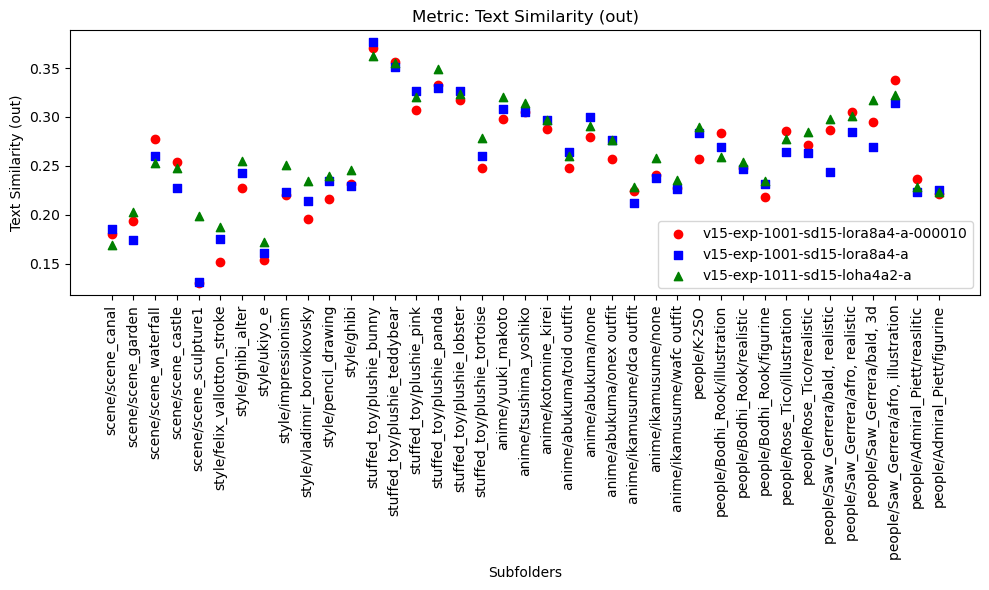

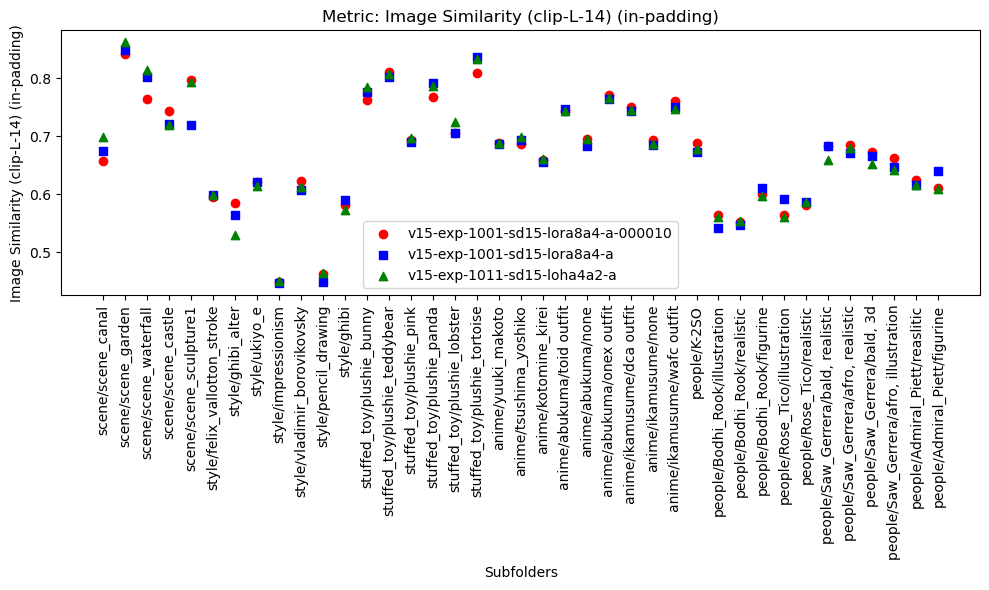

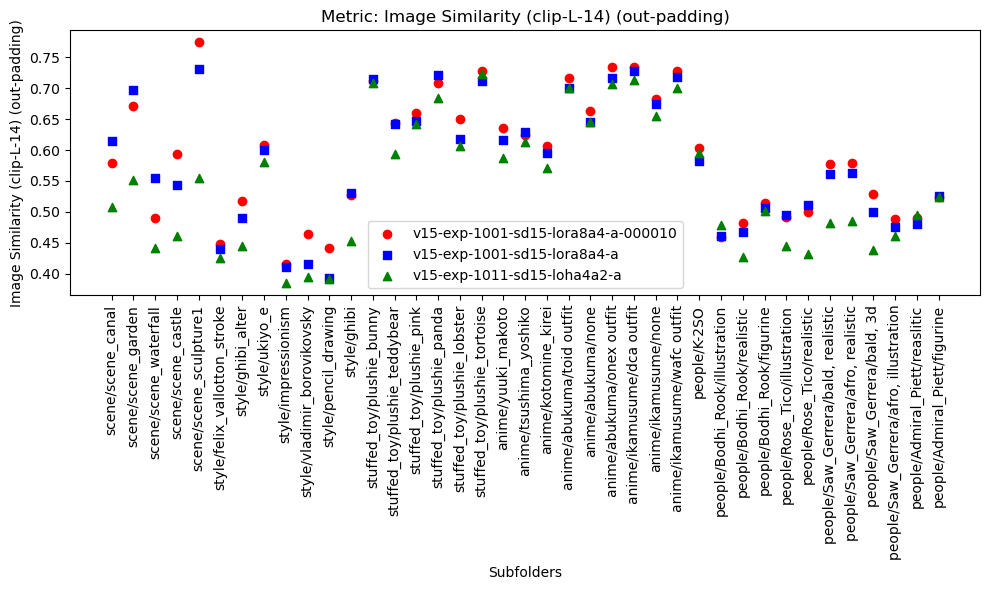

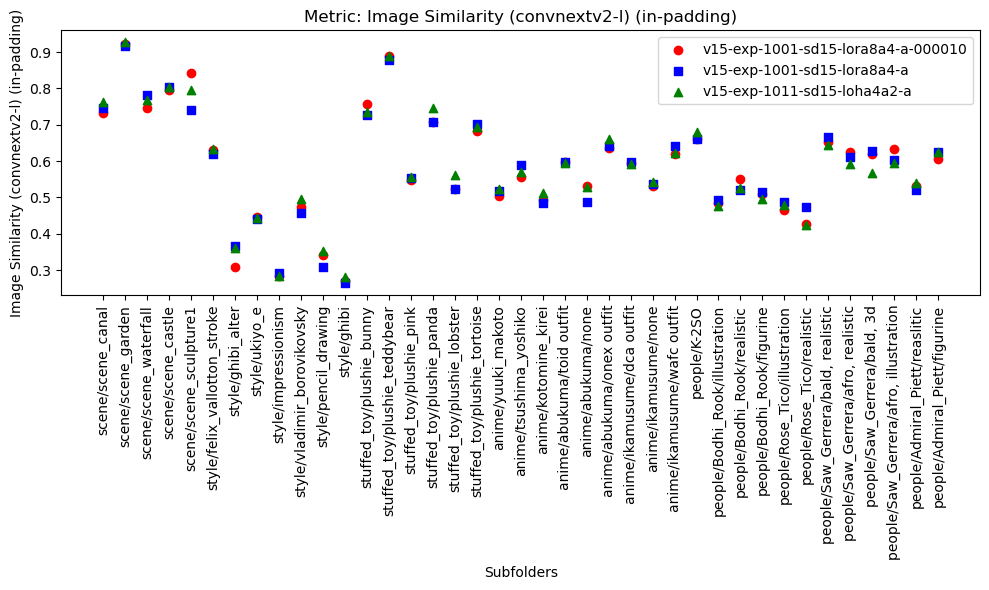

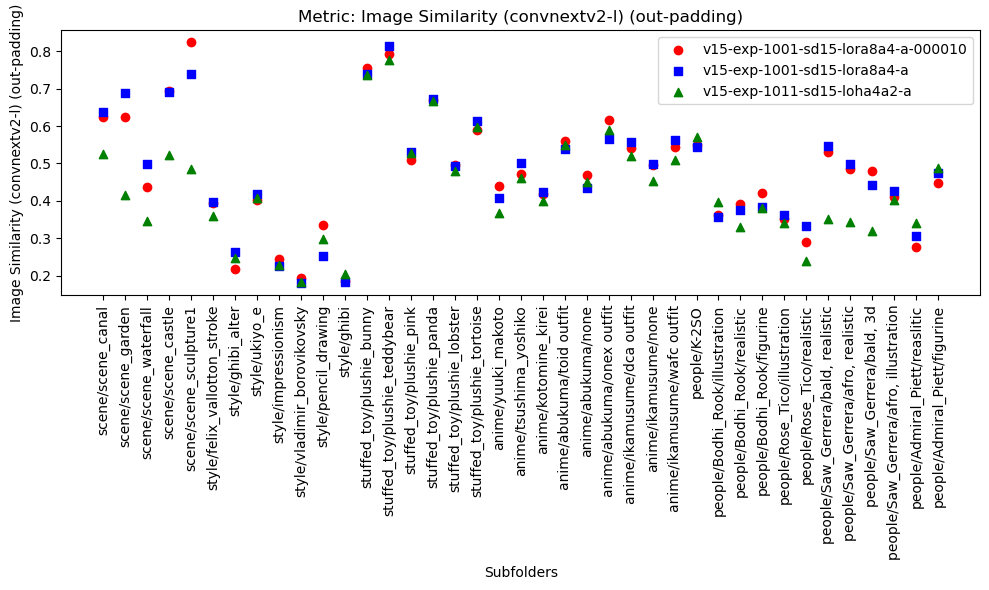

In [58]:
resulting_dfs = plot_metrics_classwise(
    sim, ["v15-exp-1001-sd15-lora8a4-a-000010", "v15-exp-1001-sd15-lora8a4-a", "v15-exp-1011-sd15-loha4a2-a"],
    [
        "Text Similarity (in)", "Text Similarity (out)",
        "Image Similarity (clip-L-14) (in-padding)",
        "Image Similarity (clip-L-14) (out-padding)",
        "Image Similarity (convnextv2-l) (in-padding)",
        "Image Similarity (convnextv2-l) (out-padding)"
    ],
    save_folder='figures/classwise/1001-1011_10-50/')

In [55]:
resulting_dfs[resulting_dfs["Folder"].apply(lambda x: 'waterfall' in x)]

Folder  Text Similarity (in)  \
2   v15-exp-1001-sd15-lora8a4-a-000010/scene/scene...              0.213887   
41  v15-exp-1001-sd15-lora8a4-a/scene/scene_waterfall              0.212770   

    Text Similarity (out)  Image Similarity (clip-L-14) (in-resize)  \
2                0.277926                                  0.762187   
41               0.259725                                  0.799072   

    Image Similarity (clip-L-14) (out-resize)  \
2                                    0.482412   
41                                   0.543330   

    Image Similarity (clip-L-14) (in-padding)  \
2                                    0.763257   
41                                   0.801536   

    Image Similarity (clip-L-14) (out-padding)  \
2                                     0.490601   
41                                    0.555533   

    Image Similarity (convnextv2-l) (in-resize)  \
2                                      0.731702   
41                                     0.762492   

    Image Similarity (convnextv2-l) (out-resize)  \
2                                       0.409699   
41                                      0.471147   

    Image Similarity (convnextv2-l) (in-padding)  \
2                                       0.745989   
41                                      0.781210   

    Image Similarity (convnextv2-l) (out-padding)  
2                                        0.436138  
41                                       0.498302

In [56]:
folders = [
    'v15-exp-1001-sd15-lora8a4-a-000010/people/Bodhi_Rook/illustration',
    'v15-exp-1001-sd15-lora8a4-a/people/Bodhi_Rook/illustration',
    'v15-exp-1011-sd15-loha4a2-a/people/Bodhi_Rook/illustration'
]

sim[sim["Folder"].apply(lambda x: x in folders)]

Folder  Text Similarity (in)  \
4123  v15-exp-1001-sd15-lora8a4-a-000010/people/Bodh...              0.268748   
5566  v15-exp-1011-sd15-loha4a2-a/people/Bodhi_Rook/...              0.256254   
5800  v15-exp-1001-sd15-lora8a4-a/people/Bodhi_Rook/...              0.247536   

      Text Similarity (out)  Image Similarity (clip-L-14) (in-resize)  \
4123               0.283523                                  0.587296   
5566               0.259493                                  0.583820   
5800               0.268870                                  0.564359   

      Image Similarity (clip-L-14) (out-resize)  \
4123                                   0.477091   
5566                                   0.499869   
5800                                   0.478480   

      Image Similarity (clip-L-14) (in-padding)  \
4123                                   0.564730   
5566                                   0.561002   
5800                                   0.542550   

      Image Similarity (clip-L-14) (out-padding)  \
4123                                    0.459505   
5566                                    0.479098   
5800                                    0.461251   

      Image Similarity (convnextv2-l) (in-resize)  \
4123                                     0.526182   
5566                                     0.523044   
5800                                     0.531596   

      Image Similarity (convnextv2-l) (out-resize)  \
4123                                      0.390710   
5566                                      0.427367   
5800                                      0.383024   

      Image Similarity (convnextv2-l) (in-padding)  \
4123                                      0.484306   
5566                                      0.477520   
5800                                      0.492669   

      Image Similarity (convnextv2-l) (out-padding)  
4123                                       0.361888  
5566                                       0.396711  
5800                                       0.355891

In [57]:
folders = [
    'v15-exp-1001-sd15-lora8a4-a-000010/people/Bodhi_Rook/realistic',
    'v15-exp-1001-sd15-lora8a4-a/people/Bodhi_Rook/realistic',
    'v15-exp-1011-sd15-loha4a2-a/people/Bodhi_Rook/realistic'
]

sim[sim["Folder"].apply(lambda x: x in folders)]

Folder  Text Similarity (in)  \
4124  v15-exp-1001-sd15-lora8a4-a-000010/people/Bodh...              0.224119   
5567  v15-exp-1011-sd15-loha4a2-a/people/Bodhi_Rook/...              0.233914   
5801  v15-exp-1001-sd15-lora8a4-a/people/Bodhi_Rook/...              0.231710   

      Text Similarity (out)  Image Similarity (clip-L-14) (in-resize)  \
4124               0.247433                                  0.568936   
5567               0.254000                                  0.565919   
5801               0.246462                                  0.557173   

      Image Similarity (clip-L-14) (out-resize)  \
4124                                   0.496460   
5567                                   0.438757   
5801                                   0.478473   

      Image Similarity (clip-L-14) (in-padding)  \
4124                                   0.551711   
5567                                   0.553718   
5801                                   0.546729   

      Image Similarity (clip-L-14) (out-padding)  \
4124                                    0.481581   
5567                                    0.427567   
5801                                    0.468226   

      Image Similarity (convnextv2-l) (in-resize)  \
4124                                     0.561919   
5567                                     0.542506   
5801                                     0.533421   

      Image Similarity (convnextv2-l) (out-resize)  \
4124                                      0.402190   
5567                                      0.340242   
5801                                      0.386897   

      Image Similarity (convnextv2-l) (in-padding)  \
4124                                      0.550038   
5567                                      0.526808   
5801                                      0.521685   

      Image Similarity (convnextv2-l) (out-padding)  
4124                                       0.391889  
5567                                       0.331472  
5801                                       0.375268